<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/Classification_of_Pulsars_with_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s3e10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F47789%2F5148345%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T105256Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D250db53ceef8ebe7f7f584109ec792a360421e7977d1e95ed89c415bac58a28acc92d9d7d1b5ccf57b2fa117299d315520a3566dcdfa27688ee996e4e694fba42543c6735594781cdd14e2a85d21859f9922a7ce0f83785a58a61c8ecaf209468fddf56296524d05dc87078ff2921d99505a1cb21680332dc6cb6a9aeed22eaadb9af388c4c9a72016ef0c06dd1a6b7dc5d291ad9f68ab441a7077b7bd8614de0ff0241428033681f4d9f9fb81f6aaef42b36d64da84950165cb428124c42b701444b19a015cd25122258607c14affefe669f97777290fd3a988d2ce3705158c92a27c5491d0003e971b0c5cea72498785e8511379cf821738e49d9f8907e05a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


#Use required libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

#Load test data

In [ ]:
test=pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv")
test

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...,...
78372,195936,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
78373,195937,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
78374,195938,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016
78375,195939,79.476562,42.579993,0.817383,1.818474,1.903010,15.844982,10.723755,143.273847


#Load test column with 'id'column set as index

In [ ]:
testx=pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv",index_col='id')
testx

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
id,,,,,,,,
117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...
195936,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
195937,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
195938,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016


# Load the training dataset

In [ ]:
df=pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv",index_col='id')
df

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...
117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0


#Check if any Null values are present in the dataset

In [ ]:
df.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

#Check for any skewness in data by plotting distplot

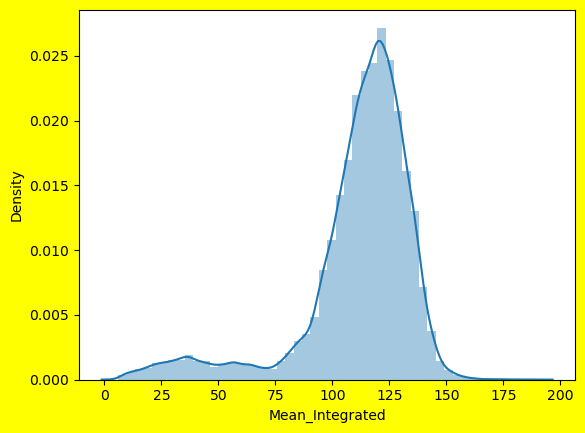

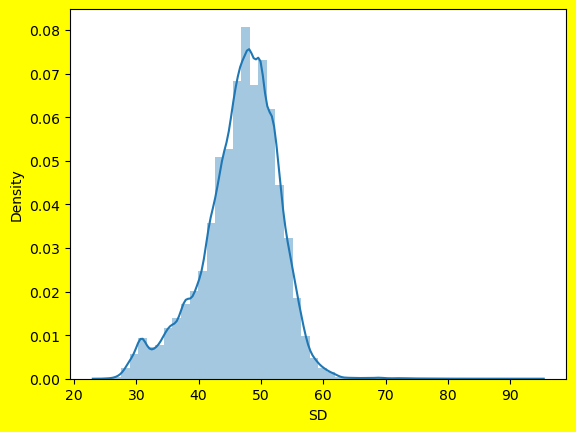

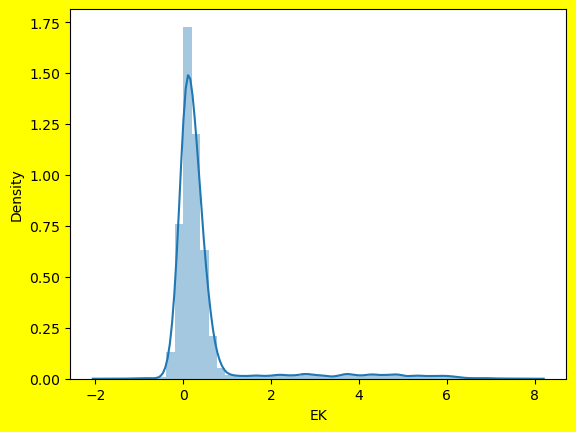

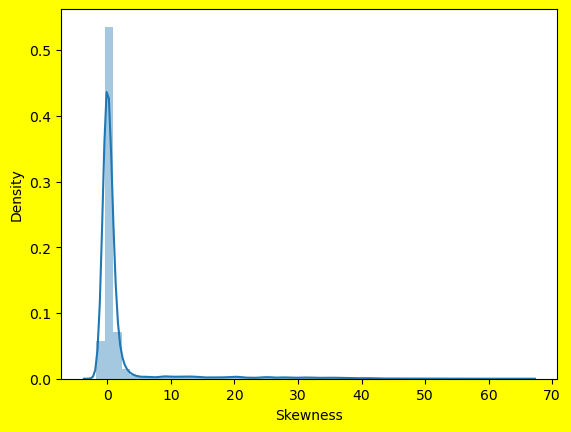

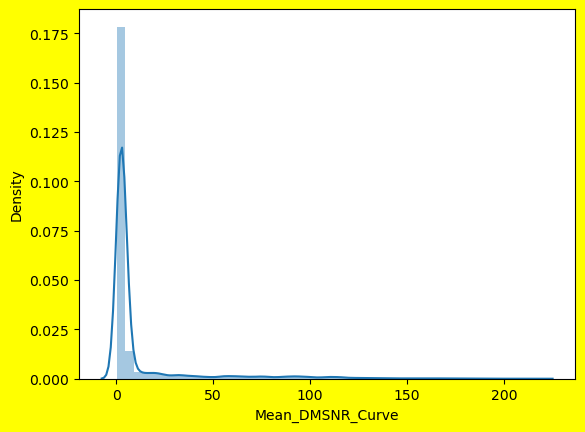

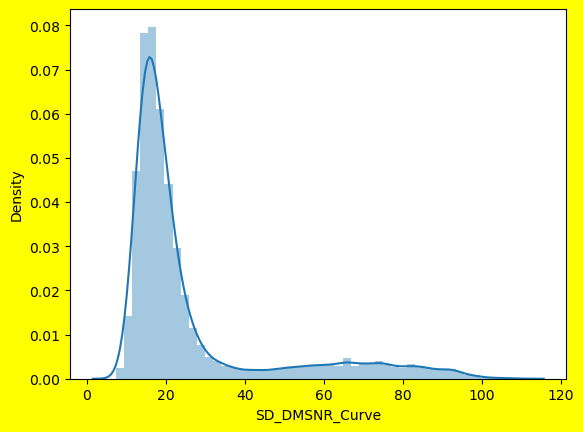

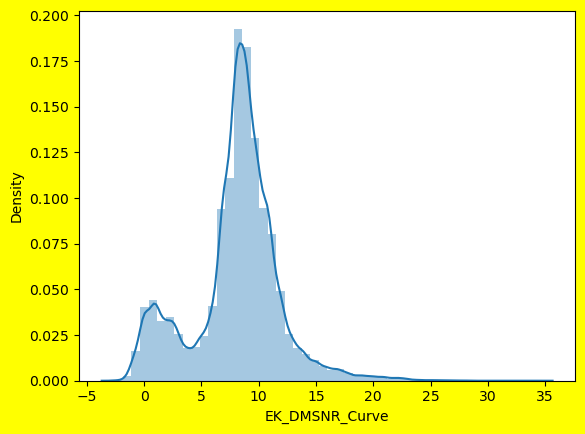

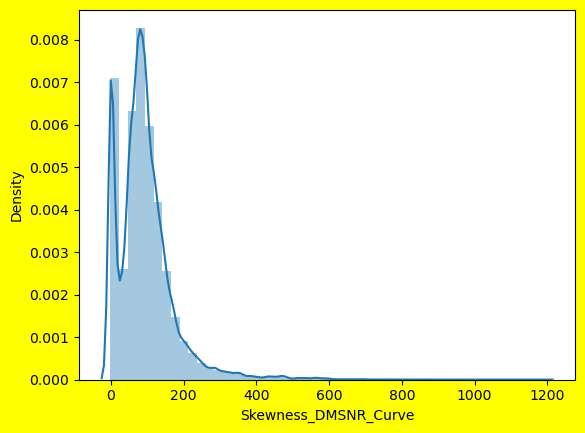

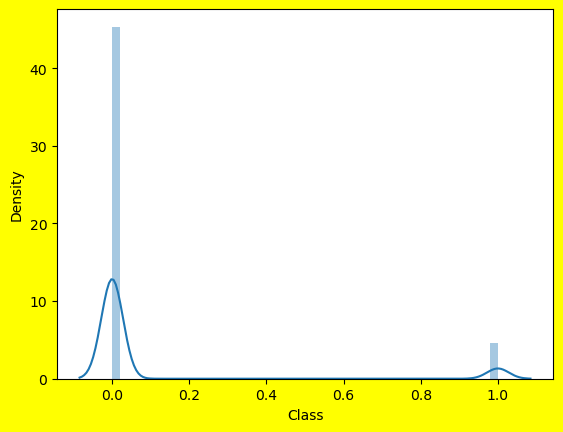

In [ ]:
for i in df.columns:
    plt.figure(facecolor='yellow')
    sns.distplot(df[i])

#check if any skewness is present in dataset

In [ ]:
df.skew()

Mean_Integrated        -1.841348
SD                     -0.523879
EK                      3.434997
Skewness                4.397575
Mean_DMSNR_Curve        3.424710
SD_DMSNR_Curve          2.010345
EK_DMSNR_Curve         -0.041686
Skewness_DMSNR_Curve    2.374033
Class                   2.796941
dtype: float64

In [ ]:
df['Mean_DMSNR_Curve']=np.log(df['Mean_DMSNR_Curve'])

In [ ]:
df['SD_DMSNR_Curve']=np.log(df['SD_DMSNR_Curve'])


#check if any skewness is present in dataset after trimming down the skewness in data


In [ ]:
df.skew()

Mean_Integrated        -1.841348
SD                     -0.523879
EK                      3.434997
Skewness                4.397575
Mean_DMSNR_Curve        1.619373
SD_DMSNR_Curve          1.250849
EK_DMSNR_Curve         -0.041686
Skewness_DMSNR_Curve    2.374033
Class                   2.796941
dtype: float64

#plot box plot and check if any outliers are present in dataset

Mean_Integrated            Axes(0.125,0.53;0.133621x0.35)
SD                      Axes(0.285345,0.53;0.133621x0.35)
EK                       Axes(0.44569,0.53;0.133621x0.35)
Skewness                Axes(0.606034,0.53;0.133621x0.35)
Mean_DMSNR_Curve        Axes(0.766379,0.53;0.133621x0.35)
SD_DMSNR_Curve             Axes(0.125,0.11;0.133621x0.35)
EK_DMSNR_Curve          Axes(0.285345,0.11;0.133621x0.35)
Skewness_DMSNR_Curve     Axes(0.44569,0.11;0.133621x0.35)
Class                   Axes(0.606034,0.11;0.133621x0.35)
dtype: object

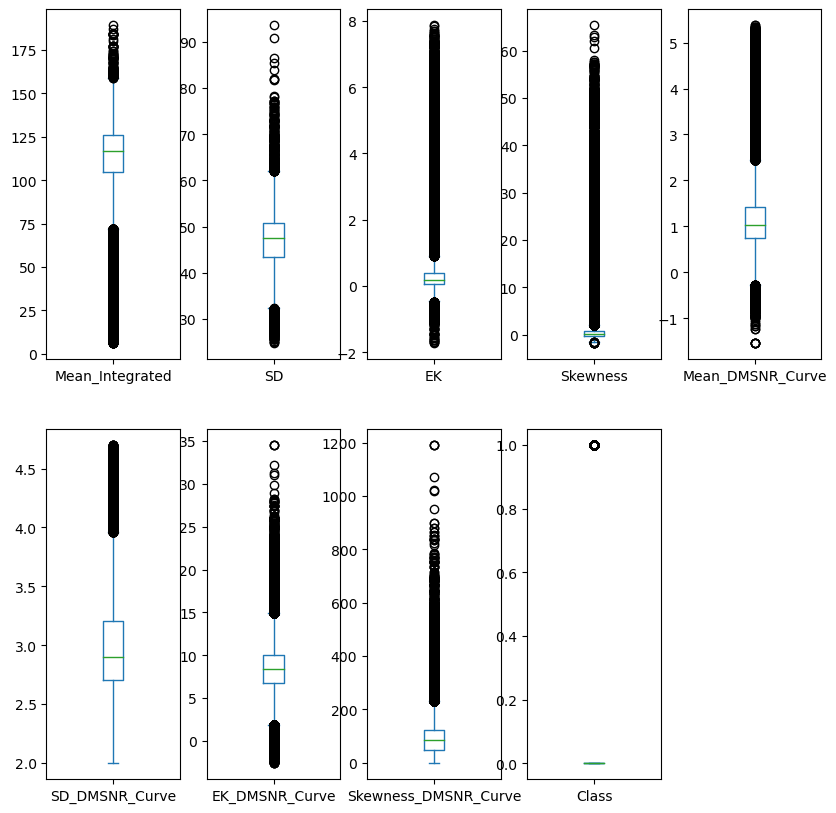

In [ ]:

df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

#Check for if the dataset is imbalaced or not

In [ ]:
df['Class'].value_counts()

0    106597
1     10967
Name: Class, dtype: int64

In [ ]:
x=df.iloc[:,0:-1]

In [ ]:
y=df.iloc[:,-1]

#Use the smote method and SMOTE is special library that will be assisting us in making dataset balanced.

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

#Use standard scaler for stndardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=scaler.fit_transform(trainx)

X

array([[ 1.25670999,  2.19895583, -0.8882659 , ...,  1.08484114,
        -1.07843069, -0.74938932],
       [ 0.08348063, -0.75366431, -0.6966758 , ..., -0.63422285,
         0.37929188, -0.04039509],
       [ 0.73394859, -0.3055221 , -0.72393946, ..., -1.12403143,
         0.64678665,  0.39779035],
       ...,
       [-0.92099246, -1.51643094,  1.148215  , ...,  0.65420779,
        -0.59429324, -0.63749352],
       [-0.66994688,  0.4201964 ,  0.18676796, ...,  1.15805509,
        -1.14787735, -0.75314668],
       [-1.45536994, -1.21968396,  1.68565089, ...,  1.12044537,
        -0.98016076, -0.73191059]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,trainy,test_size=0.20,random_state=42)

#Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

lg.fit(x_train,y_train)
print("Model score: ",lg.score(x_train,y_train))
lgpred=lg.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,lgpred))
print("Confusion Matrix: ",confusion_matrix(y_test,lgpred))
print("Classification report: ",classification_report(y_test,lgpred))

Model score:  0.9729881856292691
Accuracy Score:  0.973334271441638
Confusion Matrix:  [[21022   252]
 [  885 20480]]
Classification report:                precision    recall  f1-score   support

           0       0.96      0.99      0.97     21274
           1       0.99      0.96      0.97     21365

    accuracy                           0.97     42639
   macro avg       0.97      0.97      0.97     42639
weighted avg       0.97      0.97      0.97     42639



#Applying Decision Tree Classifier Algorithm as its providing the best model Accuracy

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
print("Decison Tree model Score: ",dtc.score(x_train,y_train))
dtcpred=dtc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,dtcpred))
print("Confusion Matrix: ",confusion_matrix(y_test,dtcpred))
print("Classification Report: ",classification_report(y_test,dtcpred))
print('\n')

Decison Tree model Score:  1.0
Accuracy Score:  0.981824151598302
Confusion Matrix:  [[20836   438]
 [  337 21028]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98     21274
           1       0.98      0.98      0.98     21365

    accuracy                           0.98     42639
   macro avg       0.98      0.98      0.98     42639
weighted avg       0.98      0.98      0.98     42639





**As we can see the Decision Tree Classifier Algorithm with criterion 'gini' is giving best model accuracy hence

**using Decisoion Tree Classifier Algorithm for prediction****

In [ ]:
submission=dtc.predict(testx)
submission
test_id=test['id']
dfx=pd.DataFrame({'id':test_id,'Class':submission})
dfx.to_csv("submission.csv")

**#Applying Decision Tree Classifier Algorithm as its providing the best model Accuracy******

In [ ]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
print("Decison Tree model Score: ",dtc.score(x_train,y_train))
dtcpred=dtc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,dtcpred))
print("Confusion Matrix: ",confusion_matrix(y_test,dtcpred))
print("Classification Report: ",classification_report(y_test,dtcpred))
print('\n')

Decison Tree model Score:  1.0
Accuracy Score:  0.9804873472642417
Confusion Matrix:  [[20801   473]
 [  359 21006]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98     21274
           1       0.98      0.98      0.98     21365

    accuracy                           0.98     42639
   macro avg       0.98      0.98      0.98     42639
weighted avg       0.98      0.98      0.98     42639





In [ ]:
submissionx=dtc.predict(testx)
submissionx
test1_id=test['id']

In [ ]:
dfa=pd.DataFrame({'id':test1_id,'Class':submissionx})
dfa.to_csv("submission.csv")